In [117]:
import gmaps
import numpy as np
import pandas as pd
import os
from scipy.stats import linregress
from sklearn import datasets
import matplotlib.pyplot as plt
import scipy.stats


In [118]:
path = pd.read_csv('../01._Prospective_Project_Data/1._72199_158097_compressed_indeed_job_dataset.csv/indeed_job_dataset_V2_CSV.csv')
df = pd.DataFrame(path)
#df.head()

In [119]:
# number of records
print(len(df))

5715


In [120]:
# df_cleaned = df.drop(columns=df.columns[(df['No_of_Skills'] == '0').any()])
df_cleaned = df.dropna(subset=['No_of_Skills'])

#df.loc[df['No_of_Skills']].dropna()
df_cleaned.head(5)


,Unnamed: 0,Job_Title,Link,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0,0,0,0,0,0,1,0,0,0


In [156]:
# Visualize
print(len(df_cleaned))

5483


In [157]:
one=df_cleaned.mean()
one

Unnamed: 0                          2855.391209
Salary_Index                           3.356009
No_of_Skills                           8.133868
No_of_Reviews                       4397.459983
No_of_Stars                            3.845737
Date_Since_Posted                     22.317793
Unnamed: 17                                 NaN
python                                 0.606420
sql                                    0.566113
machine learning                       0.418931
r                                      0.407441
hadoop                                 0.312603
tableau                                0.225424
sas                                    0.171621
spark                                  0.279227
java                                   0.269925
Others                                 0.939632
CA                                     0.243480
NY                                     0.105964
VA                                     0.058909
TX                                     0

In [159]:
#avg_job=one.groupby(["Queried_Salary"]).mean()
#avg_job
#rename_Nskill = avg_job.rename(columns={"No_of_Skills": "Avg_No_Skills"})
#rename_Nskill

In [160]:
#create a dataframe to hold the above results
new_df = df_cleaned[["Job_Title", "Job_Type", "Queried_Salary", "Salary_Index", "No_of_Skills", "Skill", "Company_Industry", "Location"]]
new_df.head()

,Job_Title,Job_Type,Queried_Salary,Salary_Index,No_of_Skills,Skill,Company_Industry,Location
0,Data Scientist,data_scientist,<80000,1,2.0,"['SAP', 'SQL']",Health Care,MO
1,Data Scientist,data_scientist,<80000,1,5.0,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",NaN,TX
2,Data Scientist,data_scientist,<80000,1,9.0,"['Data Mining', 'Data Management', 'R', 'SAS',...",NaN,OR
3,Graduate Studies Program - Data Scientist,data_scientist,<80000,1,1.0,['Certified Internal Auditor'],Government,DC
4,Data Scientist I,data_scientist,<80000,1,7.0,"['Statistical Software', 'Time Management', 'R...",Banks and Financial Services,TX


In [161]:
salaryIndex_sort=new_df.sort_values(["Salary_Index"],ascending = True)
salaryIndex_sort.head()

,Job_Title,Job_Type,Queried_Salary,Salary_Index,No_of_Skills,Skill,Company_Industry,Location
0,Data Scientist,data_scientist,<80000,1,2.0,"['SAP', 'SQL']",Health Care,MO
2801,Aircraft Data Analyst,data_analyst,<80000,1,7.0,"['JavaScript', 'Confluence', 'Time Management'...",NaN,TX
2800,Data Analyst,data_analyst,<80000,1,3.0,"['Python', 'SQL', 'AWS']",NaN,TX
2799,Data Analyst,data_analyst,<80000,1,2.0,"['Data Warehouse', 'SQL']",Auto,OH
2798,Healthcare Data Analyst I,data_analyst,<80000,1,5.0,"['SAS', 'SQL', 'Microsoft Office', 'Excel', 'M...",NaN,NV


In [163]:
average=salaryIndex_sort.mean()
average

Salary_Index    3.356009
No_of_Skills    8.133868
dtype: float64

In [164]:
job_df = salaryIndex_sort.groupby(by=['Queried_Salary'],as_index=False)['Job_Title'].count()
job_df

,Queried_Salary,Job_Title
0,100000-119999,1360
1,120000-139999,1272
2,140000-159999,862
3,80000-99999,894
4,<80000,687
5,>160000,408


In [165]:
job_df = salaryIndex_sort.groupby(by=['Queried_Salary'],as_index=False)['No_of_Skills'].count()
job_df

,Queried_Salary,No_of_Skills
0,100000-119999,1360
1,120000-139999,1272
2,140000-159999,862
3,80000-99999,894
4,<80000,687
5,>160000,408


In [167]:
#calculate total number of job type
job_df = new_df['Job_Title'].value_counts()
#length of the count of each unique school name
#skill_df_n = len(skill_df)
print(job_df)

Data Scientist                                                     701
Data Engineer                                                      383
Data Analyst                                                       378
Senior Data Scientist                                              205
Senior Data Engineer                                               134
                                                                  ... 
Senior Associate, Ignition - Data Scientist                          1
HAIMA - HC Data Analyst                                              1
Sr. Data Scientist (Pricing of Consumer Products)                    1
e-Data Analyst, philosophy                                           1
Project and Data Analyst, Global Security and Resilience Ser...      1
Name: Job_Title, Length: 2210, dtype: int64


In [168]:
avg_job=salaryIndex_sort.groupby(['Job_Type']).mean()
avg_job
rename_Nskill = avg_job.rename(columns={"No_of_Skills": "Avg_No_Skills"})
rename_Nskill

,Salary_Index,Avg_No_Skills
Job_Type,,
data_analyst,2.142945,4.939877
data_engineer,3.830508,11.015475
data_scientist,3.890224,8.653045


In [169]:
avg_skills=salaryIndex_sort.groupby(["Queried_Salary"]).mean()
avg_skills

,Salary_Index,No_of_Skills
Queried_Salary,,
100000-119999,3,8.606618
120000-139999,4,9.767296
140000-159999,5,9.727378
80000-99999,2,6.473154
<80000,1,4.410480
>160000,6,8.007353


In [170]:
#avg skills per salary range
skill_salary_grouped=new_df.groupby(["Salary_Index"]).mean()
skill_salary_grouped
#skill_salary = skill_salary_grouped["No_of_Skills"].mean()
#skill_salary

,No_of_Skills
Salary_Index,
1,4.410480
2,6.473154
3,8.606618
4,9.767296
5,9.727378
6,8.007353


In [171]:
skill_salary=skill_salary.sort_values()
skill_salary

Queried_Salary
<80000           4.410480
80000-99999      6.473154
>160000          8.007353
100000-119999    8.606618
140000-159999    9.727378
120000-139999    9.767296
Name: No_of_Skills, dtype: float64

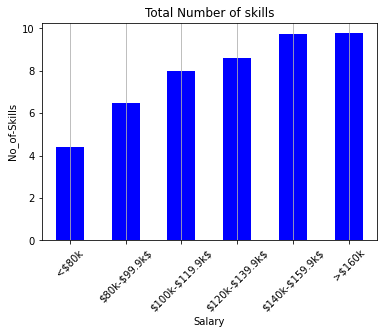

<Figure size 432x288 with 0 Axes>

In [176]:
# Generate a bar plot showing the queried salary and the average number of skills. 
skills_bar=skill_salary.plot(kind="bar", color="b", title="Total Number of skills")

skills_bar.xaxis.grid(True) # adding vertical grid lines
skills_bar.set_xlabel("Salary")
skills_bar.set_ylabel("No_of-Skills")
orientation=plt.xticks(rotation=45)#rotation of the labels
skills_bar.set_xticklabels(("<$80k","$80k-$99.9k$","$100k-$119.9k$","$120k-$139.9k$", "$140k-$159.9k$",">$160k")) 


plt.show()
plt.tight_layout()

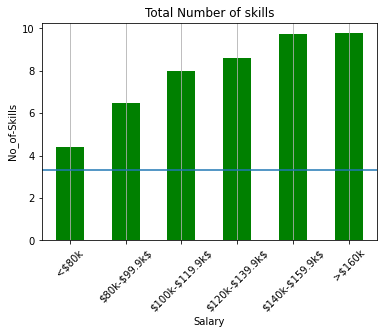

<Figure size 432x288 with 0 Axes>

In [177]:
# Generate a bar plot showing the queried salary and the average number of skills. 
skills_bar=skill_salary.plot(kind="bar", color="g", title="Total Number of skills")

skills_bar.xaxis.grid(True) # adding vertical grid lines
skills_bar.set_xlabel("Salary")
skills_bar.set_ylabel("No_of-Skills")
orientation=plt.xticks(rotation=45)#rotation of the labels
skills_bar.set_xticklabels(("<$80k","$80k-$99.9k$","$100k-$119.9k$","$120k-$139.9k$","$140k-$159.9k$",">$160k")) 



# use axhline
mean = df["Salary_Index"].mean()
line=skills_bar.axhline(mean)

#skills_bar.xlabel('x',rotation=0)
#df=skill_salary({'allvarlist':range(5),'importances':np.random.randint(50,size=5)})
#df.sort_values('importances',inplace=True)
#ax.set_ylabel('abc', rotation=0, fontsize=20, labelpad=20)

plt.show()
plt.tight_layout()



In [137]:
x = np.arange(["No_of_Skills"])
y=np.array(["Salary_Index"])
scipy.stats.pearsonr(x,y)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [178]:
# Plot out skills versus salary 
#money = [1,2,3,4,5,6]

plt.plot(money,new_df,color="green", label="skill")

#y_values =df.y_values
#plt.scatter(x_values,y_values)
plt.xlabel('money')
plt.ylabel('Number')
plt.show()

NameError: name 'money' is not defined

In [318]:
plt.scatter(test["No_of-Skills"],facecolor="red", marker="o",edgecolor="black")
plt.title("chart")


KeyError: 'No_of-Skills'

In [319]:
combined_df=pd.merge(avg_skills,job_df, how='left', on=["Queried_Salary"])
combined_df

,Queried_Salary,Salary_Index,No_of_Skills,Job_Title,Job_Type
0,100000-119999,3,8.606618,1360,1360
1,120000-139999,4,9.767296,1272,1272
2,140000-159999,5,9.727378,862,862
3,80000-99999,2,6.473154,894,894
4,<80000,1,4.410480,687,687
5,>160000,6,8.007353,408,408


In [285]:
#index_df=combined_df.set_index(["Queried_Salary"])["Salary_Index"]


In [288]:
salary_sort=combined_df.sort_values(["Salary_Index"],ascending = True)
#salary_sort

In [289]:
rename_skill = salary_sort.rename(columns={"No_of_Skills": "Avg_No_Skills"})
rename_skill

,Queried_Salary,Salary_Index,Avg_No_Skills,Job_Title,Job_Type
4,<80000,1,4.410480,687,687
3,80000-99999,2,6.473154,894,894
0,100000-119999,3,8.606618,1360,1360
1,120000-139999,4,9.767296,1272,1272
2,140000-159999,5,9.727378,862,862
5,>160000,6,8.007353,408,408


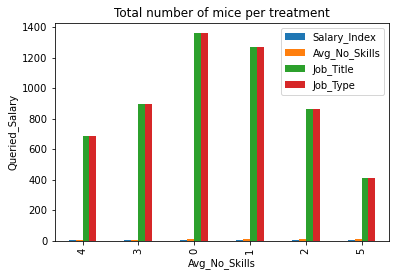

<Figure size 432x288 with 0 Axes>

In [292]:
# Generate a bar plot showing the queried salary and the average number of skills. 
test=rename_skill.plot(kind="bar", title="Total number of mice per treatment")
test.set_xlabel("Avg_No_Skills")
test.set_ylabel("Queried_Salary")
plt.show()
plt.tight_layout()


In [206]:
#new_df["Queried_Salary"]=new_df["Queried_Salary"].str.replace("<", " ")
#new_df["Queried_Salary"]=new_df["Queried_Salary"].str.replace(">", " ")
#new_df["Queried_Salary"]

In [207]:
#new_df["Queried_Salary"]=new_df["Queried_Salary"].astype(float)

data_scientist    2496
data_analyst      1630
data_engineer     1357
Name: Job_Type, dtype: int64

In [113]:
df.iloc[:,5]


Series([], Name: Job_Type, dtype: object)

In [ ]:
 #Column Reordering